<a href="https://www.kaggle.com/hellbuoy/humanitarian-aid-pca-clustering" target="target">Kaggle challenge</a>
# Problem: 
Which country needs financial aid/ social projects the most? <br/>
# Approach: 
Prioritize the countries using some socio-economic and health factors that determine the overall development of the country. 

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_colwidth', 500)

In [203]:
# Columns meanings:
df_desc = pd.read_csv('data-dictionary.csv')
df_desc

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services. Given as %age of the Total GDP
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age of the Total GDP
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [204]:
df_country = pd.read_csv('./Country-data.csv')
df_country.shape

(167, 10)

In [205]:
df_country.sample(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
63,Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
155,Uganda,81.0,17.1,9.01,28.6,1540,10.600,56.8,6.15,595
59,Ghana,74.7,29.5,5.22,45.9,3060,16.600,62.2,4.27,1310
150,Togo,90.3,40.2,7.65,57.3,1210,1.180,58.7,4.87,488
84,Lao,78.9,35.4,4.47,49.3,3980,9.200,63.8,3.15,1140
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800


In [206]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [207]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [208]:
print('Missing values?')
nulls_country = df_country.isna().mean()*100
nulls_country

Missing values?


country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [209]:
print('Duplicated values?')
df_country.loc[df_country.duplicated()]

Duplicated values?


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [210]:
# Datatype check for the dataframe
df_country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

None of the columns have inconsistent datatype, hence no conversion is required

# Data Visualization

In [211]:
import seaborn as sns

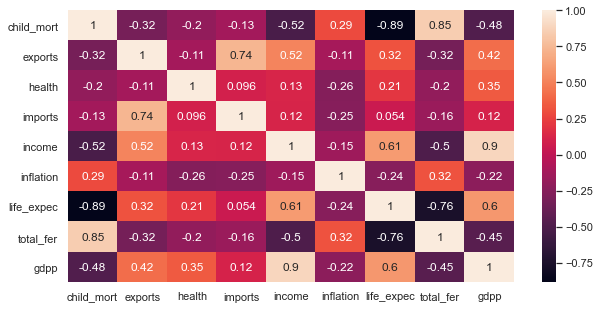

In [212]:
plt.figure(figsize=(10,5))
sns.heatmap(df_country.corr(), annot=True)

gdpp and income have strong positive correlation (0.9)
<br/>child_mort and total_fer have strong positive correlation (0.85)
<br/>child_mort and life_expec have strong negative correlation (-0.89)
<br/>total_fer and life_expec have strong negative correlation (-0.76)

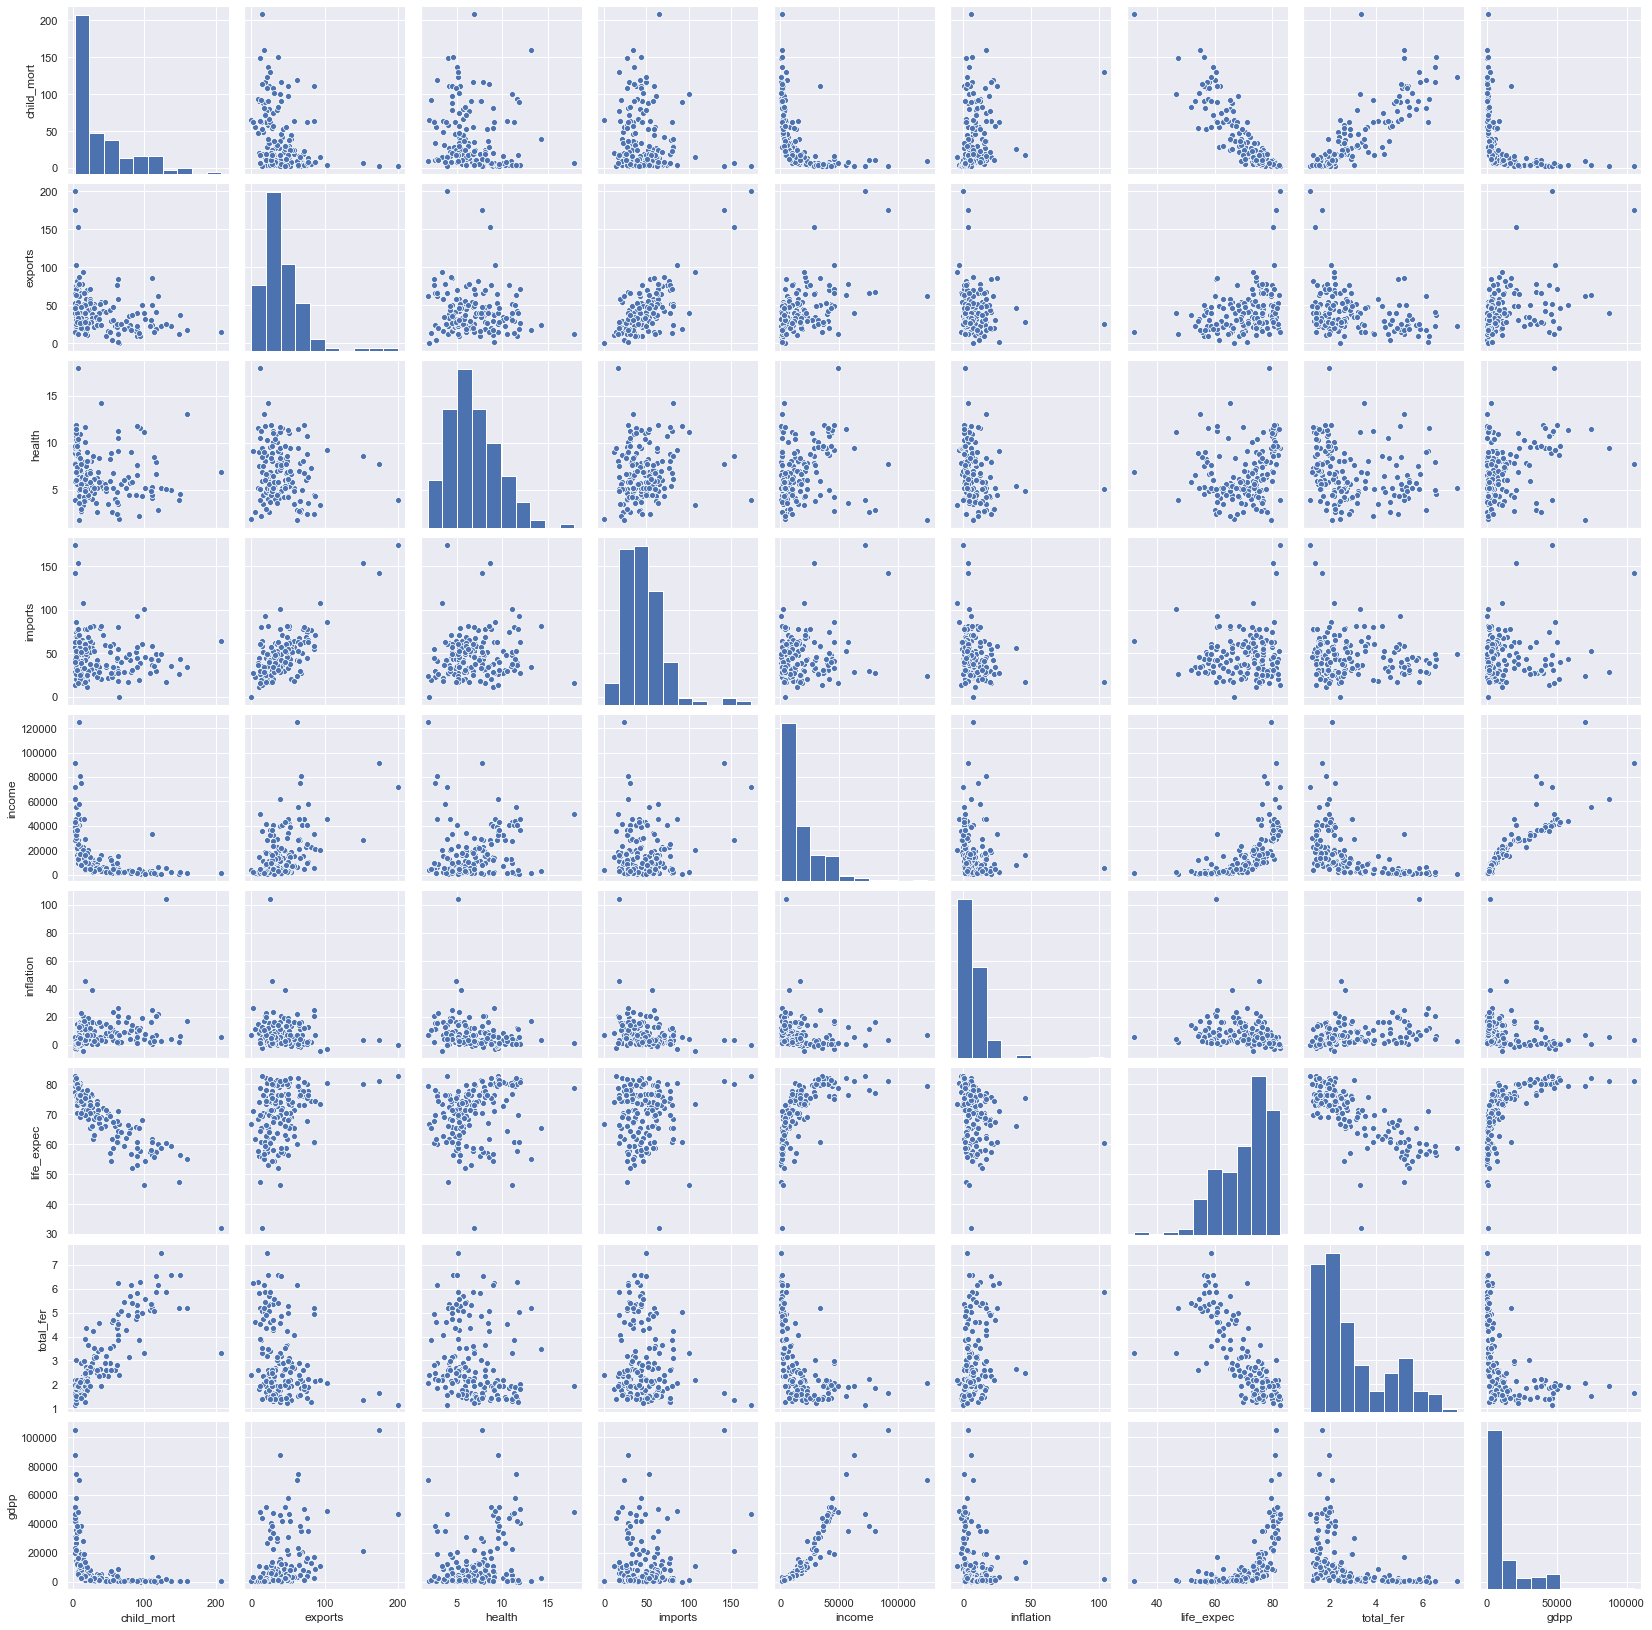

In [213]:
sns.pairplot(df_country)

Though highly correlated, We notice GDP per capita should not be a measure of personal income.<br/>
When the income increase: the life_expec increase as well as the child_mort decrease.<br/>
As GDP per capita increases, life expectancy increases.<br/>

# Data Preparation

Deducing imports,exports and health spending from percentage values to actual values of their GDP per capita.<br/>Because the percentage values don't give a clear picture of that country. <br/>For example Austria and Belarus have almost same exports % but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [214]:
# Converting exports,imports and health spending percentages to absolute values.

df_country['exports'] = df_country['exports'] * df_country['gdpp']/100
df_country['imports'] = df_country['imports'] * df_country['gdpp']/100
df_country['health'] = df_country['health'] * df_country['gdpp']/100

In [215]:
df_country.sample()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
149,Timor-Leste,62.6,79.2,328.32,1000.8,1850,26.5,71.1,6.23,3600


In [216]:
# We can drop the country column as it doesn't add any indication, we consider it as a categorical ID, 
# we also do the calues standardization later so we only need the numerical values
df_country_dropped = df_country.copy()
country = df_country_dropped.pop('country')

In [217]:
features_nbr = len(df_country_dropped.columns)
print("original data columns:  ", features_nbr)
features = list(df_country_dropped)
features

original data columns:   9


['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [218]:
df_country_dropped

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [219]:
# Standarizing features via scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country_dropped)

In [220]:
df_country_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# Dimensionality reduction

In [221]:
from sklearn.decomposition import PCA

`svd_solver = "randomized"`: randomized SVD. 
<br/>Linear dimensionality reduction using approximated Singular Value Decomposition of the data and keeping only the most significant singular vectors to project the data to a lower dimensional space.

In [222]:
pca = PCA(svd_solver = "randomized", random_state = 42) #  integer seed 42 to control reproducibility.
pca_data = pca.fit(df_country_scaled)
pca_data

PCA(random_state=42, svd_solver='randomized')

In [223]:
import numpy as np

## variance ratio (coverage)
variance = pca.explained_variance_ratio_
print(variance)
print("Cumulative Explained Variance: " + str(np.cumsum(variance)[-1]))

[5.89372984e-01 1.84451685e-01 9.91147170e-02 6.07227801e-02
 3.02917253e-02 2.45982702e-02 9.39743701e-03 1.55641971e-03
 4.93981394e-04]
Cumulative Explained Variance: 0.9999999999999996


PCA1 captures 58.9% of the data, PCA2 captures 18.4% of the data, PCA3 captures 9.9% of the data<br/>
=> Cumulative Explained Variance: 87.2% <br/> Around 90% of the data is covered by the first 3 principal components

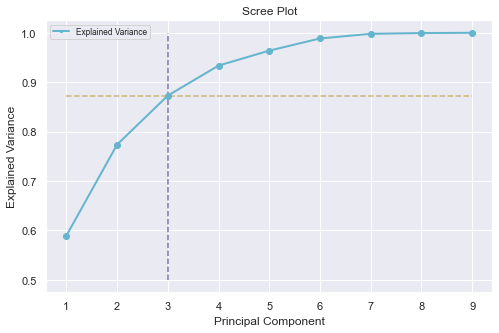

In [224]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

num_pc = features_nbr
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_pc) + 1
plt.plot(np.arange(num_pc) + 1, np.cumsum(variance), 'co-', linewidth=2)
plt.vlines(x=3, ymax=1, ymin=0.5, colors="m", linestyles="--")
plt.hlines(y=0.872, xmax=9, xmin=1, colors="y", linestyles="--")

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')


leg = plt.legend(['Explained Variance'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)

In [225]:
for x in range(0,3):
    # Let's get the top components of PCx:
    print("top components of PC" + str(x+1) + ":")
    rel_values = np.abs(pca.components_[x])/np.sum(np.abs(pca.components_[x]))
    print("Feature Names: " + str([features[i] for i in np.argsort(-rel_values)[:3]]))
    print("Percentages: " + str(rel_values[np.argsort(-rel_values)[:3]]))
    print()

top components of PC1:
Feature Names: ['gdpp', 'income', 'health']
Percentages: [0.13639867 0.12959666 0.12226292]

top components of PC2:
Feature Names: ['child_mort', 'total_fer', 'exports']
Percentages: [0.1713675  0.16541181 0.14295789]

top components of PC3:
Feature Names: ['inflation', 'life_expec', 'child_mort']
Percentages: [0.55541965 0.11522314 0.08785124]



In [226]:
pca_df = pd.DataFrame({'Features':features, 'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})
pca_df

,Features,PC_1,PC_2,PC_3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


In [227]:
import plotly.express as px

fig = px.scatter_3d(pca_df, x='PC_1', y='PC_2', z='PC_3', color = 'Features')
fig.show()

- `life expectency`, `income`, `gdpp` and `health` are very well explained by PC1.
- `child mortality` and `total fertility` are well explained by PC2.
- `inflation` is well explained by PC3.
- `imports` and `exports` are well explained by both the components PC1 and PC2.

In [228]:
from sklearn.decomposition import IncrementalPCA
# Building the dataframe using Incremental PCA for better efficiency.
inc_pca = IncrementalPCA(n_components=3)
df_inc_pca = inc_pca.fit_transform(df_country_scaled)

In [229]:
df_pca = pd.DataFrame(df_inc_pca, columns=["PC_1", "PC_2","PC_3"])
df_pca_final = pd.concat([country, df_pca], axis=1)
df_pca_final.sample(5)

,country,PC_1,PC_2,PC_3
117,Panama,0.303028,-0.877558,-0.208919
129,Senegal,-1.862720,0.493654,-0.917758
32,Chad,-3.188892,2.352278,-1.063464
51,Estonia,1.065579,-0.924334,-0.202814
111,New Zealand,2.207085,-0.460403,0.040223


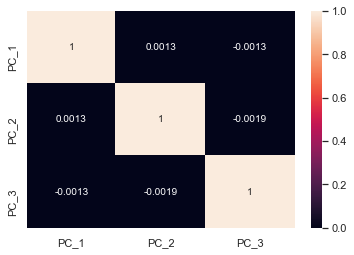

In [230]:
sns.heatmap(df_pca_final.corr(), annot = True)

Correlation among the attributes is close to 0 so we can say there is no more dependency in the dataset.

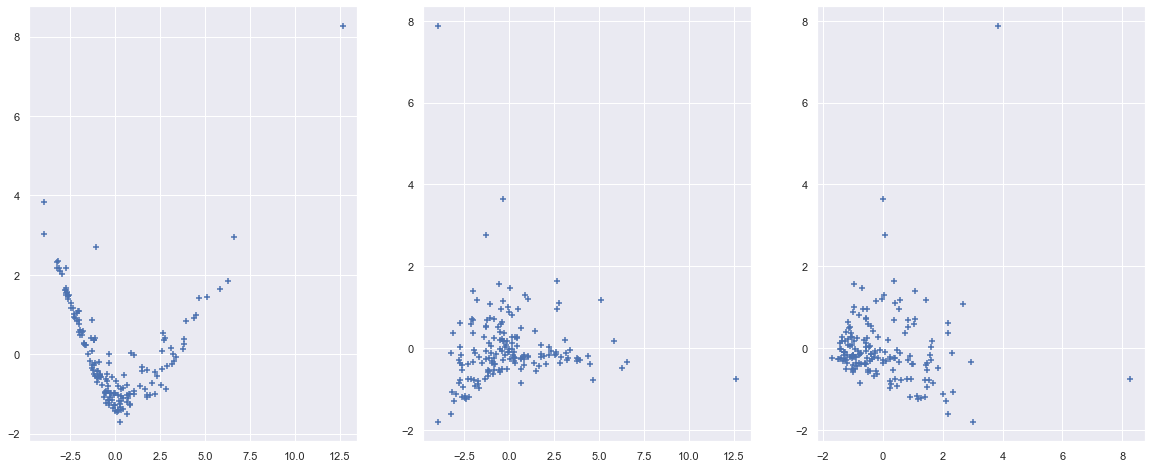

In [232]:
sns.set(style='darkgrid')
plt.figure(figsize =(20,8))
plt.subplot(1,3,1)
plt.scatter(df_pca_final['PC_1'], df_pca_final['PC_2'], marker = '+')
plt.subplot(1,3,2)
plt.scatter(df_pca_final['PC_1'], df_pca_final['PC_3'], marker = '+')
plt.subplot(1,3,3)
plt.scatter(df_pca_final['PC_2'], df_pca_final['PC_3'], marker = '+')

We notice the presence of outliers.

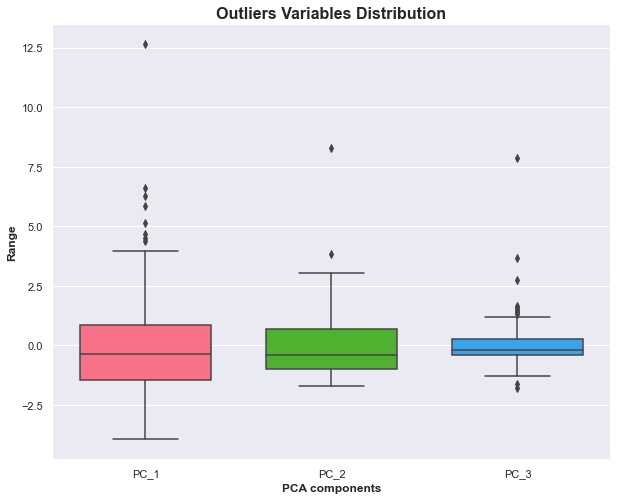

In [233]:
# Outliers Analysis with BoxPlots
components = ['PC_1', 'PC_2', 'PC_3']
plt.figure(figsize=(10,8))
plt.title("Outliers Variables Distribution", fontsize = 16, fontweight= 'bold')
plt.xlabel("PCA components", fontweight= 'bold')
plt.ylabel("Range", fontweight= 'bold')
sns.boxplot(data = df_pca_final[components], orient='v', palette='husl', whis=1.5,saturation=1, width=0.7)

In [234]:
# PC_1
Q1 = df_pca_final.PC_1.quantile(0.05)
Q3 = df_pca_final.PC_1.quantile(0.95)
df_pca_final = df_pca_final[(df_pca_final.PC_1 >= Q1) & (df_pca_final.PC_1 <= Q3)]

# PC_2
Q1 = df_pca_final.PC_2.quantile(0.05)
Q3 = df_pca_final.PC_2.quantile(0.95)
df_pca_final = df_pca_final[(df_pca_final.PC_2 >= Q1) & (df_pca_final.PC_2 <= Q3)]

# PC_3
Q1 = df_pca_final.PC_3.quantile(0.05)
Q3 = df_pca_final.PC_3.quantile(0.95)
df_pca_final = df_pca_final[(df_pca_final.PC_3 >= Q1) & (df_pca_final.PC_3 <= Q3)]

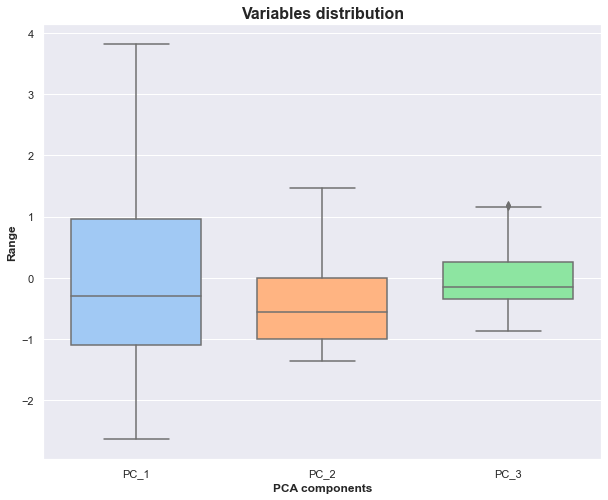

In [235]:
plt.figure(figsize=(10,8))
plt.title("Variables distribution", fontsize=16, fontweight='bold')
plt.xlabel("PCA components", fontweight='bold')
plt.ylabel("Range", fontweight='bold')

sns.boxplot(data = df_pca_final[components], orient='v', whis = 1.5, saturation = 1, palette = 'pastel', width = 0.7)

In [238]:
df_pca_final.head(5)

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Algeria,-0.457626,-0.673301,0.961867
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103
3,Armenia,-0.332692,-1.274517,0.176636
4,Australia,3.180362,-0.250785,-0.116877


In [323]:
df_pca_final = df_pca_final.reset_index(drop=True)
df_pca_numerric_data = df_pca_final.drop(['country'],axis=1)
df_pca_numerric_data.head(5)

,PC_1,PC_2,PC_3
0,-2.637442,1.469038,-0.541359
1,-0.457626,-0.673301,0.961867
2,0.649849,-1.024374,-0.250103
3,-0.332692,-1.274517,0.176636
4,3.180362,-0.250785,-0.116877


In [241]:
pip install pyclustertend

Note: you may need to restart the kernel to use updated packages.


### Hopkins test
From the <a href="https://pyclustertend.readthedocs.io/en/latest/" target="target">Package documentation</a>:
"A statistical test which allow to guess if the data follow an uniform distribution. <br/>If the hopkins score tends to 0 => The data is not uniformly distributed. Hence clustering can be useful to classify the observations. <br/>if the score is too high (above 0.5 for exemple) => the data is uniformly distributed and clustering can’t be really useful for the problem at hand."

In [322]:
from pyclustertend import hopkins
hopkins(df_pca_numerric_data, len(df_pca_numerric_data)) 
# As the dataset is not big, we take the sampling size as the whole ds

0.27241503352234164

# Model Building

In [319]:
from sklearn.cluster import KMeans
kvals = []
wsses = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state= 0)
    model = kmeans.fit(df_pca_numerric_data)
    wsse = model.inertia_
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_pca_numerric_data, cluster_labels)
    kvals.append(k)
    wsses.append(wsse)
    print("k={}, Set Sum of Squared Errors= {}".format(k, wsse))
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))
    print("\n")

k=2, Set Sum of Squared Errors= 172.59700820690244
For n_clusters=2, the silhouette score is 0.4873400103541441


k=3, Set Sum of Squared Errors= 91.26428788897097
For n_clusters=3, the silhouette score is 0.4639771456218248


k=4, Set Sum of Squared Errors= 68.60223211679364
For n_clusters=4, the silhouette score is 0.3987356568367148


k=5, Set Sum of Squared Errors= 54.870079854582414
For n_clusters=5, the silhouette score is 0.36170980333920066


k=6, Set Sum of Squared Errors= 46.44586981971067
For n_clusters=6, the silhouette score is 0.3660635304732296


k=7, Set Sum of Squared Errors= 39.510897031652995
For n_clusters=7, the silhouette score is 0.37560668451142154


k=8, Set Sum of Squared Errors= 33.57855293840437
For n_clusters=8, the silhouette score is 0.37556755376127404




In [314]:
# kmeans_df = pd.DataFrame({'k': kvals, 'wsse': wsses})
# kmeans_df.reset_index(drop = True)

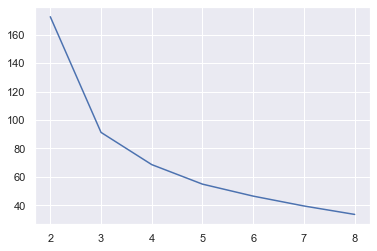

In [317]:
from matplotlib import pyplot
pyplot.plot(kvals, wsses)

Using the elbow method, we can choose 4 or 5. <br/>To find the ideal number of clusters for K-means clustering we can also refer to the Silhouette Score.

In [344]:
clusters_5 = KMeans(n_clusters = 5, random_state = 0)
clusters_5.fit(df_pca_numerric_data)

KMeans(n_clusters=5, random_state=0)

In [345]:
clusters_5.labels_

array([2, 4, 1, 4, 3, 3, 4, 1, 1, 0, 1, 4, 0, 0, 0, 2, 1, 1, 0, 3, 0, 1,
       4, 4, 2, 2, 1, 3, 1, 4, 4, 0, 4, 2, 1, 0, 3, 3, 2, 2, 4, 3, 2, 1,
       4, 0, 0, 1, 3, 0, 4, 4, 2, 1, 3, 4, 3, 4, 4, 2, 3, 0, 2, 1, 2, 1,
       1, 2, 1, 1, 3, 2, 1, 0, 4, 0, 0, 2, 0, 3, 1, 2, 1, 4, 4, 0, 1, 1,
       1, 4, 2, 0, 1, 1, 3, 2, 2, 1, 3, 4, 2, 4, 3, 0, 2, 0, 4, 1, 0, 2,
       4, 3, 3, 3, 1, 4, 0, 4, 2], dtype=int32)

In [346]:
df_pca_numerric_data['cluster_id']=clusters_5.labels_
df_pca_numerric_data.head()

,PC_1,PC_2,PC_3,cluster_id
0,-2.637442,1.469038,-0.541359,2
1,-0.457626,-0.673301,0.961867,4
2,0.649849,-1.024374,-0.250103,1
3,-0.332692,-1.274517,0.176636,4
4,3.180362,-0.250785,-0.116877,3


In [347]:
df_pca_numerric_data['cluster_id'].value_counts() # nbr of countries in each cluster

1    29
4    26
2    23
0    22
3    19
Name: cluster_id, dtype: int64

In [348]:
px.scatter_3d(df_pca_numerric_data, x='PC_1', y='PC_2', z='PC_3', color='cluster_id')

We notice there is a lot of lot of intra-distance between the cluster elements, which is not a good sign. We change n_clusters to 4 and notice the same.